In [1]:
import numpy as np
import networkx as nx
from specializeGraph import specializeGraph
from specializeGraph import drawGraph
from scipy import linalg as la

### Spectral Radius of the Laplacian - Jul 11 2018
(Before and After Specialization)

A few initial examples. The spectral radius remained the same in each case here.

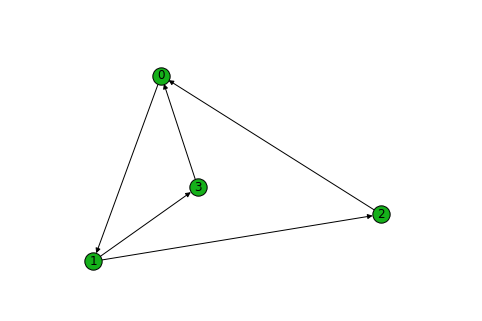

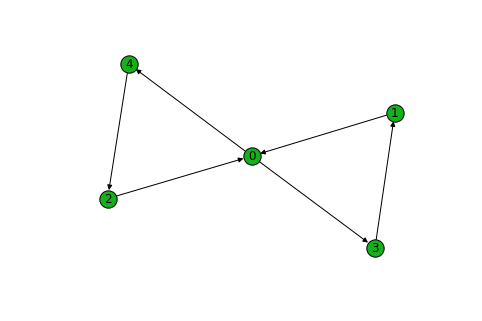

In [2]:
#Make a graph
#List of edges
e = [(0,1),(1,2),(1,3),(2,0),(3,0)]
#Initialize a directed graph object
G = nx.DiGraph(e)
#Get the adjacency matrix
A = nx.adj_matrix(G).toarray().T
#Draw it using one of the functions I made
#(located in specializeGraph.py)
drawGraph(A)
#Specialize the graph and draw it
drawGraph(specializeGraph(A,[0,2,3])[0])

In [3]:
def L(A):
    """Return the laplacian"""
    return np.diag(A.sum(axis=0)) - A

def specialLapSpecR(A,Base):
    """ Return the spectral radius of the lapalican of the graph
        before and after specialization
    """
    #Spectral radius (largest eigenvector) before
    eigs = la.eig(L(A))[0]
    #The line below computes the absolute value of
    #each eigenvector
    specR = max((eigs*eigs.conj())**.5)

    #Spectral radius after specialization
    SP = specializeGraph(A,Base)[0]
    SPeigs = la.eig(L(SP))[0]
    SPspecR = max((SPeigs*SPeigs.conj())**.5)
    
    return(specR,SPspecR)

Make a bunch of adjacency matrixes and compare spectral radius before and after specialization

In [4]:
A = np.array([
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0]
])

base = [0,2,3]

specialLapSpecR(A,base)

((2.236067977499788+0j), (2.236067977499787+0j))

In [5]:
#5x5 matrix of zeros
A = np.zeros((5,5))
#Make the first column all ones
A[0,:] = np.ones(5)
#Make the first row all ones
A[:,0] = np.ones(5)

base = [1,2,3,4]

specialLapSpecR(A,base)


((5+0j), (4.999999999999999+0j))

In [6]:
A = np.array([
    [0,1,0,0],
    [1,0,0,1],
    [0,1,0,0],
    [0,0,1,0]
])

base = [0,2,3]

specialLapSpecR(A,base)


((2.0000000234421083+0j), (2.0000041808395044+0j))

Below is the graph from Dr. Webbs paper. I used it to make sure that my specialization function was working properly.

Note: Isomorphic means the same. If two graphs are isomorphic is means there is a way to relabel the vertices so that they are exactly equivalent.

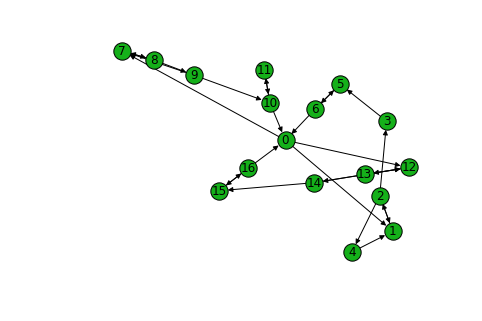

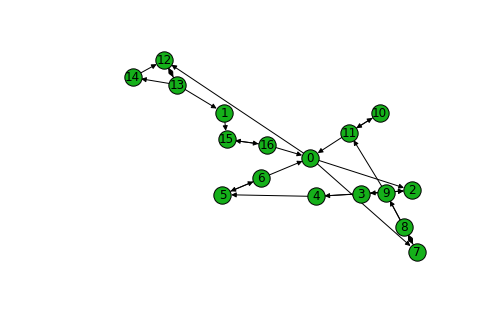

Isomorphic: True


((3.370713675513623+0j), (3.3868734755518766+0j))

In [7]:
A = np.array([
    [0,0,0,0,0,0,1],
    [1,0,1,0,1,0,0],
    [0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,0,1,1,0,1],
    [0,0,0,0,1,1,0]

])

base = [0,3]

comp = np.array([
    [0,1,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,1],
    [0,0,0,1,0]
])
As = la.block_diag(A,comp,comp)
As[5,4] = 0
As[6,4] = 0
As[7,0] = 1
As[12,0] = 1
As[0,10] = 1
As[0,-1] = 1

spA = specializeGraph(A,[0,3])[0]

drawGraph(As)
drawGraph(spA)

print("Isomorphic: " + str(nx.is_isomorphic(nx.DiGraph(As),nx.DiGraph(spA))))
specialLapSpecR(A,base)
